In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record25.mat
/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record26.mat
/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record17.mat
/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record1.mat
/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record3.mat
/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record22.mat
/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record20.mat
/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record15.mat
/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record13.mat
/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record14.mat
/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record10.mat
/kaggle/input/eeg-data-for-mental-attention-state-detect

In [59]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

# Load the .mat file
mat_data = loadmat('/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record1.mat')

# Inspect the content of the .mat file
print(mat_data.keys())  # Lists the variables stored in the .mat file

# Access a specific variable (replace 'variable_name' with an actual name from the file)


dict_keys(['__header__', '__version__', '__globals__', 'o'])


In [60]:
o = mat_data['o']
o.dtype

dtype([('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('timestamp', 'O'), ('data', 'O'), ('trials', 'O')])

- id: Id of something
- tag: ????
- nS: number of samples
- sampFreq: sampling frequency = 128 Hz
- marker: ...
- timestamp: time of record (s)
- data: 
- trials: trials of channels ????

In [61]:
columns = [
    'ED_COUNTER',    'ED_INTERPOLATED',    'ED_RAW_CQ',    'ED_AF3',    'ED_F7',
    'ED_F3',    'ED_FC5',    'ED_T7',    'ED_P7',    'ED_O1',
    'ED_O2',    'ED_P8',    'ED_T8',    'ED_FC6',    'ED_F4',
    'ED_F8',    'ED_AF4',    'ED_GYROX',    'ED_GYROY',    'ED_TIMESTAMP',
    'ED_ES_TIMESTAMP',    'ED_FUNC_ID',    'ED_FUNC_VALUE',    'ED_MARKER',    'ED_SYNC_SIGNAL'
]

data = o[0][0]['data']
eeg_df = pd.DataFrame(data, columns=columns)
eeg_df.reset_index(inplace=True)
eeg_df.rename(columns={'index': 'timestamp'}, inplace=True)

- `ED_COUNTER`: A sequential counter that increments with each data packet to verify the data integrity and ensure no packets are missing.

- `ED_INTERPOLATED`:Indicates whether the data was interpolated (reconstructed) due to missing packets or signal issues.

- `ED_RAW_CQ`: __Contact Quality (CQ)__: Represents the raw signal quality of the EEG electrodes, indicating how well the electrode is making contact with the scalp.

- `ED_AF3`, `ED_F7`, `ED_F3`, `ED_FC5`, `ED_T7`, `ED_P7`, `ED_O1`, `ED_O2`, `ED_P8`, `ED_T8`, `ED_FC6`, `ED_F4`, `ED_F8`, `ED_AF4`: These are the EEG channels corresponding to the 10-20 electrode placement system, widely used in EEG studies. Each label represents a specific electrode on the scalp:
    - AF3, AF4: Frontal region.
    - F7, F3, F4, F8: Frontal areas.
    - FC5, FC6: Frontocentral regions.
    - T7, T8: Temporal regions.
    - P7, P8: Parietal regions.
    - O1, O2: Occipital region.

- `ED_GYROX` & `ED_GYROY`: Data from the gyroscope sensors embedded in the EMOTIV headset, measuring rotational motion:
    - GYROX: Movement along the X-axis.
    - GYROY: Movement along the Y-axis.

- `ED_TIMESTAMP`: The timestamp of each data packet, typically in milliseconds, used for synchronizing data.

- `ED_ES_TIMESTAMP`: The timestamp of events or system signals, such as marker insertion or user input.

- `ED_FUNC_ID`: Functional ID related to detected events, such as cognitive or emotional states (e.g., detection of focus or excitement).

- `ED_FUNC_VALUE`: The value associated with the detected function, providing intensity or magnitude.

- `ED_MARKER`: A user-defined marker inserted during recording, useful for annotating events of interest (e.g., start of a task or stimulus presentation).

- `ED_SYNC_SIGNAL`: A synchronization signal used to align EEG data with external devices or events, ensuring temporal consistency.

Signal in each channels is in a unit of EEG signal -> to turn to Hz, use Fourier Transform then using bandpass filtered for ...

In [62]:
def get_state(timestamp):
    if timestamp <= 10*128*60:
        return 'focused'
    elif timestamp > 20*128*60:
        return 'drownsy'
    else:
        return 'unfocused'

eeg_df['state'] = eeg_df['timestamp'].apply(get_state)

In [64]:
eeg_dt=eeg_df

In [65]:
eeg_dt

,timestamp,ED_COUNTER,ED_INTERPOLATED,ED_RAW_CQ,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,...,ED_AF4,ED_GYROX,ED_GYROY,ED_TIMESTAMP,ED_ES_TIMESTAMP,ED_FUNC_ID,ED_FUNC_VALUE,ED_MARKER,ED_SYNC_SIGNAL,state
0,0,3.0,0.0,463.0,4440.000000,4417.948718,5390.769231,3833.846154,4019.487179,4656.410256,...,4563.589744,1573.0,1726.0,764.304,0.031277,0.0,0.0,0.0,0.0,focused
1,1,4.0,0.0,0.0,4439.487179,4417.948718,5389.230769,3830.256410,4020.000000,4658.974359,...,4566.666667,1570.0,1727.0,764.304,0.031277,0.0,0.0,0.0,0.0,focused
2,2,5.0,0.0,447.0,4438.974359,4414.871795,5385.641026,3829.743590,4017.948718,4655.897436,...,4557.948718,1567.0,1726.0,764.304,0.031277,0.0,0.0,0.0,0.0,focused
3,3,6.0,0.0,500.0,4438.974359,4410.256410,5381.025641,3831.794872,4016.410256,4649.230769,...,4552.820513,1564.0,1723.0,764.304,0.031277,0.0,0.0,0.0,0.0,focused
4,4,7.0,0.0,424.0,4439.487179,4407.179487,5378.461538,3831.282051,4019.487179,4647.692308,...,4546.666667,1565.0,1720.0,764.304,0.031277,0.0,0.0,0.0,0.0,focused
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308863,308863,23.0,0.0,0.0,4436.923077,4564.615385,5625.128205,3828.717949,4024.615385,4800.512821,...,4713.333333,1557.0,1721.0,3180.017,2416.224854,0.0,0.0,0.0,0.0,drownsy
308864,308864,24.0,0.0,0.0,4443.076923,4555.384615,5617.948718,3830.769231,4024.102564,4798.461538,...,4704.615385,1556.0,1720.0,3180.024,2416.224854,0.0,0.0,0.0,0.0,drownsy
308865,308865,25.0,0.0,0.0,4441.538462,4554.871795,5613.846154,3828.717949,4026.666667,4795.897436,...,4701.025641,1556.0,1719.0,3180.032,2416.224854,0.0,0.0,0.0,0.0,drownsy
308866,308866,26.0,0.0,0.0,4441.538462,4556.410256,5610.256410,3825.641026,4027.179487,4787.692308,...,4696.923077,1556.0,1721.0,3180.040,2416.224854,0.0,0.0,0.0,0.0,drownsy


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
def visual_timeseries_graph_for_chanels(eeg_df):
    
    # Set timestamp as the index for easier plotting
    eeg_df.set_index('timestamp', inplace=True)
    
    # Select EEG channel columns (exclude metadata columns)
    channels = [col for col in eeg_df.columns if col.startswith('ED_') and col not in ['ED_TIMESTAMP', 'ED_ES_TIMESTAMP']]
    
    # Plot each channel
    fig, axes = plt.subplots(len(channels), 1, figsize=(15, len(channels) * 3), sharex=True)
    fig.suptitle('EEG Channel Time Series', fontsize=16)
    
    for i, channel in enumerate(channels):
        axes[i].plot(eeg_df.index, eeg_df[channel], label=channel)
        axes[i].set_ylabel(channel)
        axes[i].legend(loc='upper right')
    
    plt.xlabel('Timestamp')
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


In [67]:
eeg_df.shape[1]

27

In [68]:
# Retain only the timestamp and columns from the 4th to 17th
columns_to_keep = ['timestamp'] + eeg_df.columns[4:17].tolist()
eeg_df = eeg_df.loc[:, columns_to_keep]

# Check the result
print("Remaining columns:")
print(eeg_df.columns)



Remaining columns:
Index(['timestamp', 'ED_AF3', 'ED_F7', 'ED_F3', 'ED_FC5', 'ED_T7', 'ED_P7',
       'ED_O1', 'ED_O2', 'ED_P8', 'ED_T8', 'ED_FC6', 'ED_F4', 'ED_F8'],
      dtype='object')


In [69]:
eeg_df

,timestamp,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8
0,0,4440.000000,4417.948718,5390.769231,3833.846154,4019.487179,4656.410256,4742.051282,4415.384615,4538.461538,4308.205128,4125.641026,4283.589744,4335.384615
1,1,4439.487179,4417.948718,5389.230769,3830.256410,4020.000000,4658.974359,4738.974359,4414.871795,4535.897436,4308.205128,4136.410256,4284.615385,4331.794872
2,2,4438.974359,4414.871795,5385.641026,3829.743590,4017.948718,4655.897436,4734.358974,4414.871795,4537.435897,4308.205128,4152.820513,4283.076923,4333.846154
3,3,4438.974359,4410.256410,5381.025641,3831.794872,4016.410256,4649.230769,4730.256410,4409.743590,4535.384615,4308.717949,4157.948718,4283.076923,4334.358974
4,4,4439.487179,4407.179487,5378.461538,3831.282051,4019.487179,4647.692308,4729.230769,4408.205128,4526.666667,4307.179487,4157.948718,4285.641026,4334.358974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308863,308863,4436.923077,4564.615385,5625.128205,3828.717949,4024.615385,4800.512821,4904.615385,4629.230769,4749.230769,4316.923077,4144.615385,4280.512821,4335.384615
308864,308864,4443.076923,4555.384615,5617.948718,3830.769231,4024.102564,4798.461538,4903.589744,4629.743590,4740.512821,4319.487179,4143.589744,4283.589744,4335.897436
308865,308865,4441.538462,4554.871795,5613.846154,3828.717949,4026.666667,4795.897436,4903.076923,4627.692308,4731.794872,4320.000000,4143.076923,4285.128205,4334.871795
308866,308866,4441.538462,4556.410256,5610.256410,3825.641026,4027.179487,4787.692308,4897.435897,4621.538462,4733.333333,4318.461538,4143.589744,4283.589744,4334.358974


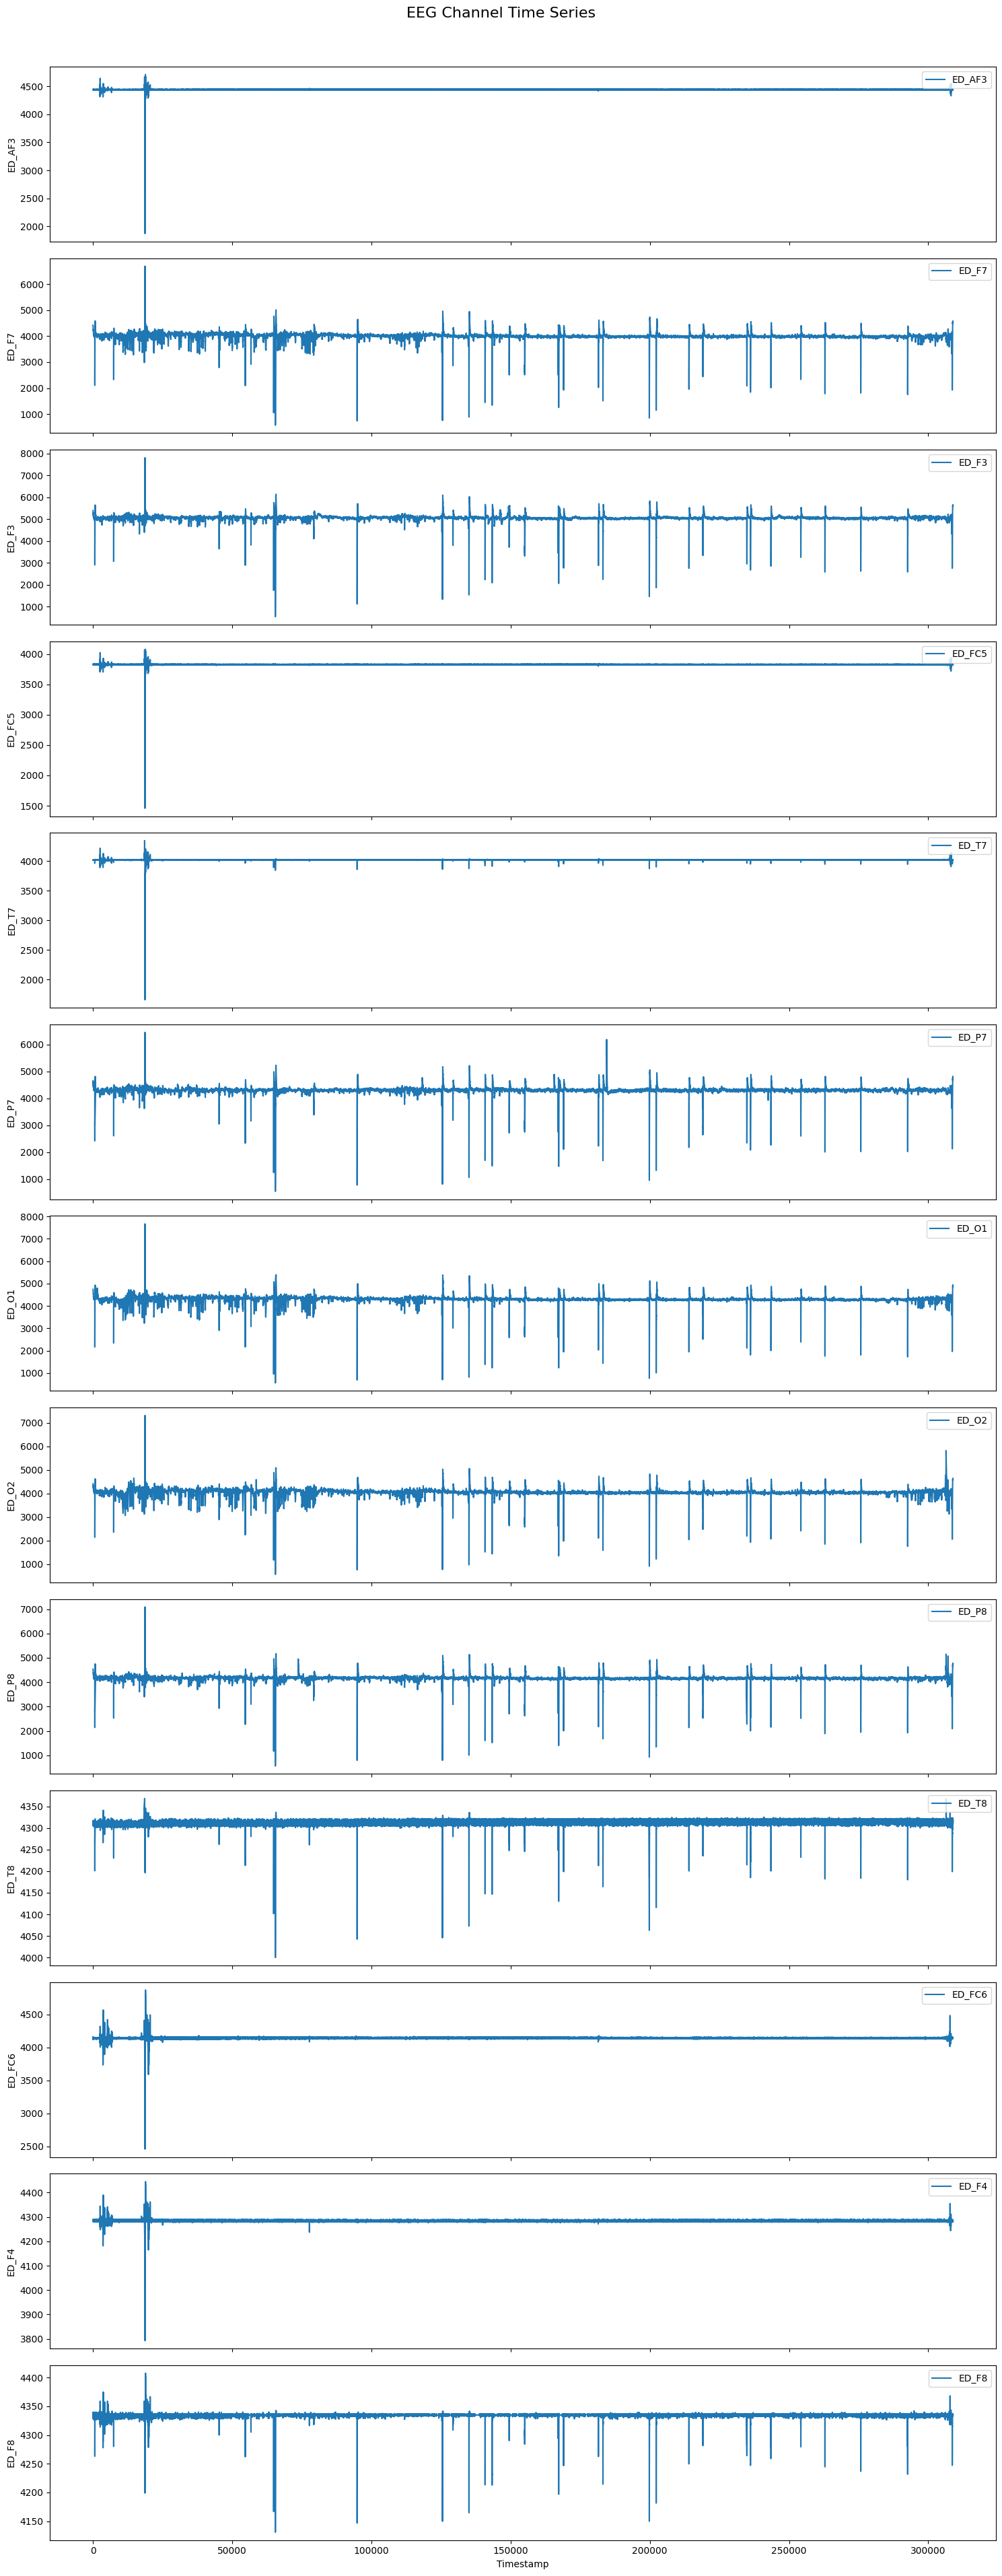

In [70]:

visual_timeseries_graph_for_chanels(eeg_df)

In [71]:
import mne
import pandas as pd

eeg_data = eeg_df.values  
sfreq = 128

# Tạo thông tin kênh EEG cho MNE
info = mne.create_info(ch_names=eeg_df.columns.tolist(), sfreq=sfreq, ch_types='eeg')

# Chuyển dữ liệu thành Raw object của MNE
raw = mne.io.RawArray(eeg_data.T, info)  # Dữ liệu cần chuyển thành shape (n_channels, n_times)

# Kiểm tra thông tin dữ liệu
print(raw.info)


Creating RawArray with float64 data, n_channels=13, n_times=308868
    Range : 0 ... 308867 =      0.000 ...  2413.023 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: ED_AF3, ED_F7, ED_F3, ED_FC5, ED_T7, ED_P7, ED_O1, ED_O2, ED_P8, ...
 chs: 13 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 13
 projs: []
 sfreq: 128.0 Hz
>


In [72]:
# Lọc tín hiệu EEG từ 1 Hz đến 40 Hz 
raw.filter(l_freq=0.2, h_freq=43)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 2113 samples (16.508 s)



<RawArray | 13 x 308868 (2413.0 s), ~30.7 MB, data loaded>

In [73]:
from mne.preprocessing import ICA

# Áp dụng ICA
ica = ICA(n_components=13, random_state=97, max_iter=800)
ica.fit(raw)
eog_indices, scores = ica.find_bads_eog(raw, ch_name="ED_AF3")  # Chỉ định 1 kênh gần mắt
ica.exclude = eog_indices
# Áp dụng ICA để loại bỏ nhiễu
raw_clean = ica.apply(raw)

# Lưu dữ liệu đã được xử lý
raw_clean.save('eeg_data_cleaned.fif')


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 8.0s.
Using EOG channel: ED_AF3
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (

/tmp/ipykernel_30/2108829780.py:12: RuntimeWarning: This filename (/kaggle/working/eeg_data_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_clean.save('eeg_data_cleaned.fif')


FileExistsError: Destination file exists. Please use option "overwrite=True" to force overwriting.

In [74]:
# Lấy dữ liệu đã xử lý từ Raw object và chuyển thành DataFrame
eeg_clean_data = raw_clean.get_data()  # Lấy dữ liệu đã xử lý từ Raw object

# Chuyển thành DataFrame và giữ nguyên timestamp là chỉ mục
eeg_clean_df = pd.DataFrame(eeg_clean_data.T, columns=eeg_df.columns.tolist(), index=eeg_df.index)



In [75]:
eeg_clean_df

,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8
timestamp,,,,,,,,,,,,,
0,-2.841758e-13,1.135871e-13,-2.269704e-13,-5.694522e-14,-7.957234e-13,-4.260537e-13,3.414752e-13,-8.809121e-13,5.968933e-13,-1.222133e-12,-2.273782e-13,2.842369e-13,-1.704835e-13
1,-6.300874e-01,1.519582e+00,-1.310540e-01,-3.728890e+00,6.350781e-01,3.802721e+00,-1.669074e+00,9.619368e-01,-1.524346e+00,-1.212596e-01,1.093847e+01,1.156294e+00,-3.535009e+00
2,-8.306230e-01,-9.000201e-01,-3.079949e+00,-3.848886e+00,-1.723245e+00,1.345918e+00,-5.055105e+00,1.169347e+00,1.605674e+00,1.967915e-01,2.666950e+01,-7.238024e-01,-1.582677e+00
3,-1.213548e+00,-3.469255e+00,-5.884216e+00,-2.183277e+00,-2.871908e+00,-3.634185e+00,-7.686583e+00,-1.755477e+00,1.734748e-01,3.654495e-01,3.250167e+01,-3.174103e-01,-9.463865e-01
4,-3.862849e-01,-5.906049e+00,-7.701185e+00,-2.467671e+00,-1.146761e-01,-4.719731e+00,-7.369154e+00,-3.020077e+00,-6.795512e+00,-9.328303e-01,3.178774e+01,1.914189e+00,-1.016153e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308863,-7.357589e+00,2.929371e+01,3.118403e+01,3.617840e+00,-4.168660e-01,3.065301e+01,2.529260e+01,2.306530e+01,2.350046e+01,-1.305563e+00,2.027335e+00,-2.405337e+00,6.349552e-01
308864,-1.846514e+00,1.770292e+01,2.077536e+01,5.573911e+00,-7.746832e-01,2.595702e+01,2.189569e+01,2.049425e+01,1.147955e+01,1.185049e+00,1.044223e+00,4.134959e-01,1.073235e+00
308865,-2.696468e+00,1.410065e+01,1.406488e+01,3.570041e+00,1.354776e+00,2.041530e+01,1.784185e+01,1.586139e+01,5.898595e-01,1.679950e+00,4.935561e-01,2.108038e+00,1.171512e-01


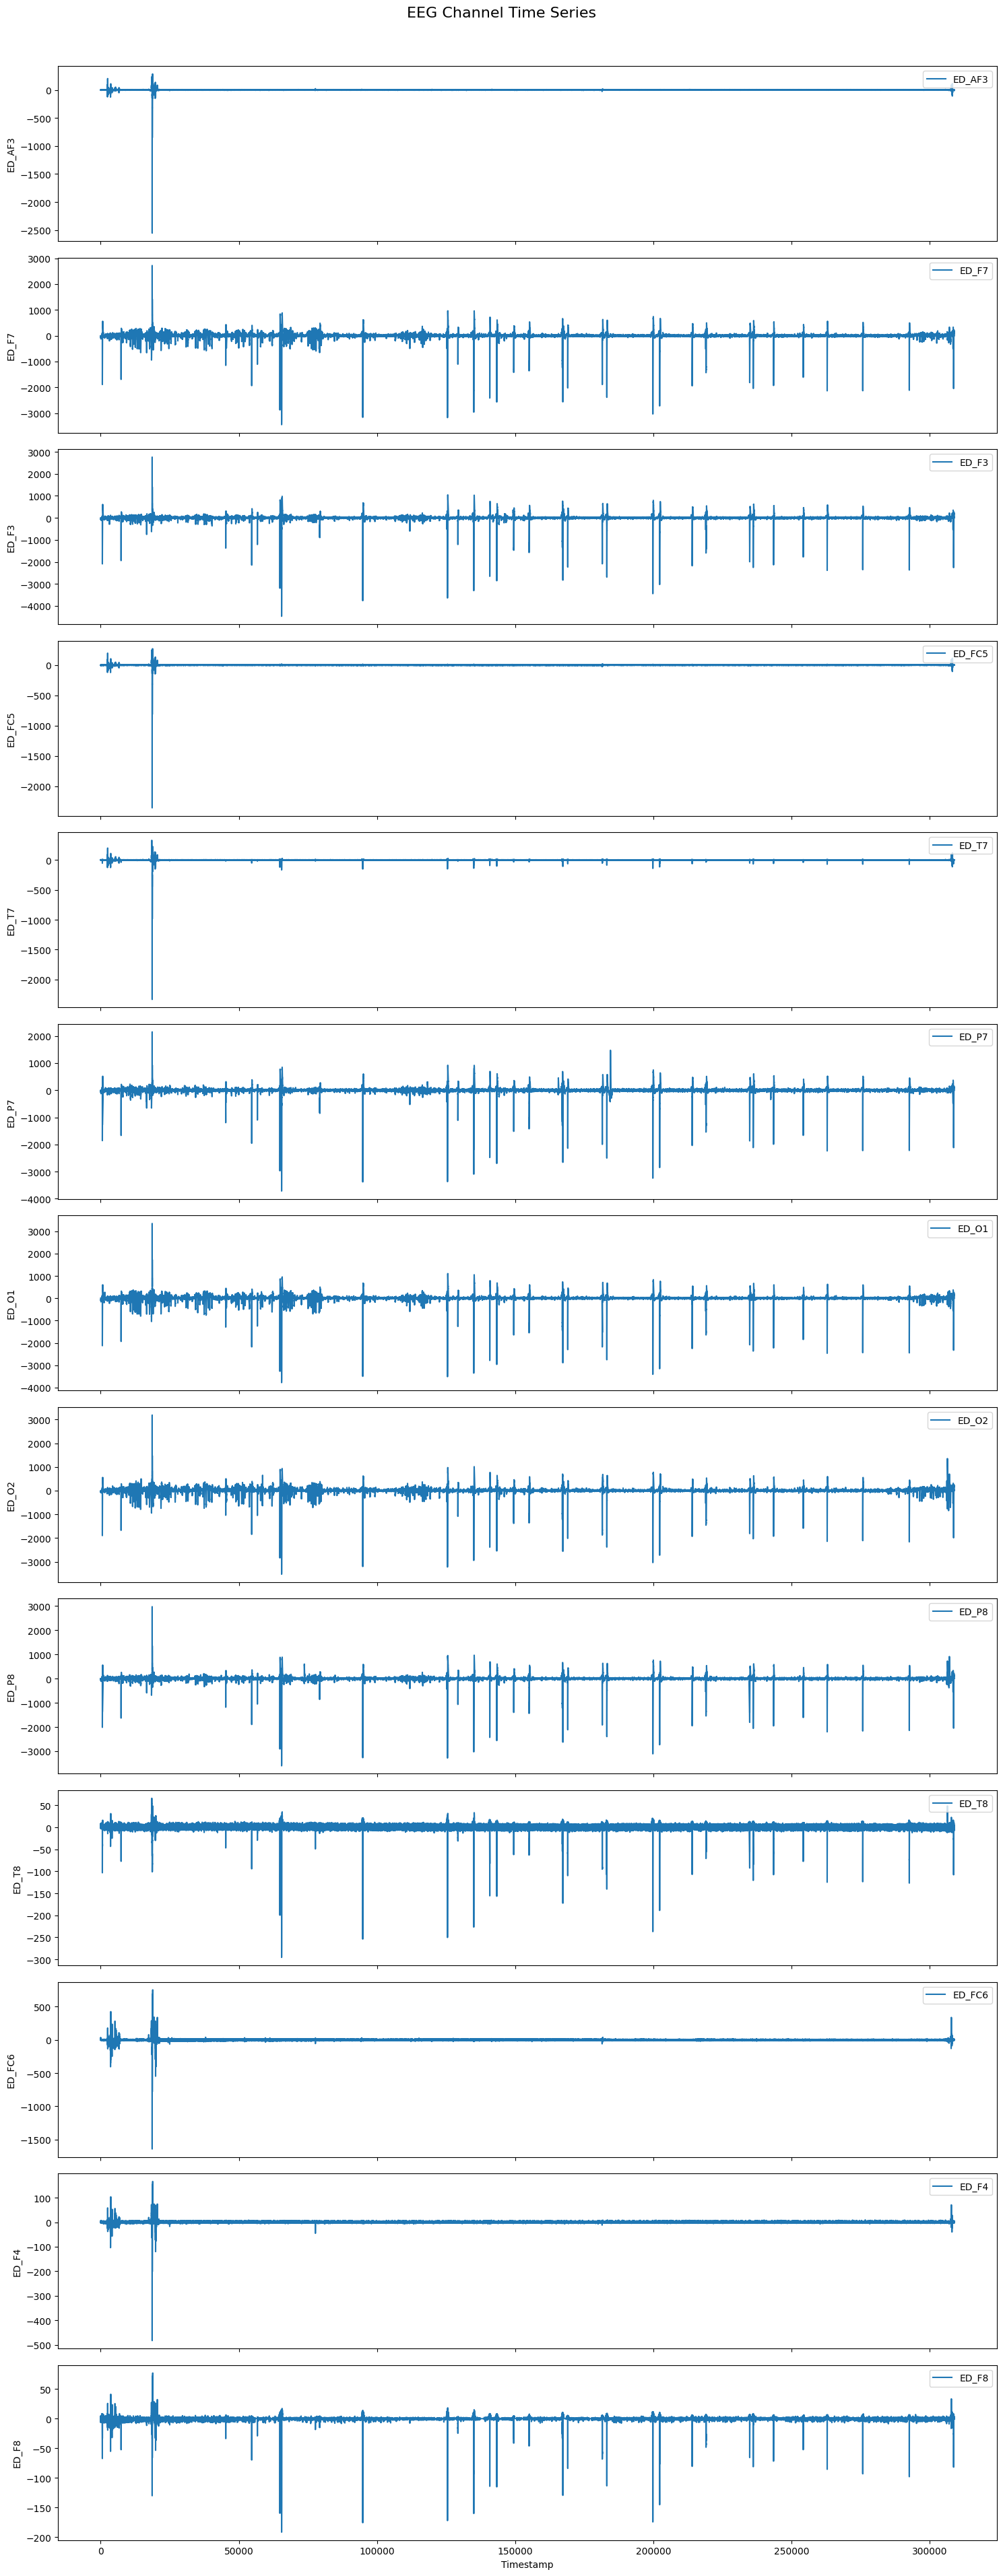

In [76]:
# Select EEG channel columns (exclude metadata columns)
channels = [col for col in eeg_clean_df.columns if col.startswith('ED_')]

# Plot each channel
fig, axes = plt.subplots(len(channels), 1, figsize=(15, len(channels) * 3), sharex=True)
fig.suptitle('EEG Channel Time Series', fontsize=16)

for i, channel in enumerate(channels):
    axes[i].plot(eeg_clean_df.index,eeg_clean_df[channel], label=channel)
    axes[i].set_ylabel(channel)
    axes[i].legend(loc='upper right')

plt.xlabel('Timestamp')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [77]:
from scipy.signal import welch
fs = 128  # Tần số mẫu (Hz)

# Hàm tính năng lượng trong các dải tần
def compute_band_power(frequencies, power_spectrum, band):
    band_idx = np.logical_and(frequencies >= band[0], frequencies <= band[1])
    return np.sum(power_spectrum[band_idx])

# Các dải tần
bands = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 12),
    "beta": (12, 30),
    "gamma": (30, 100),
}

# Duyệt qua từng kênh và tính toán PSD
result = []

for i, channel in enumerate(eeg_clean_df.columns):
    signal = eeg_clean_df[channel].values
    
    # Tính PSD bằng phương pháp Welch
    frequencies, psd = welch(signal, fs, nperseg=fs*2)
    
    # Tính năng lượng trong từng dải tần
    band_powers = {band: compute_band_power(frequencies, psd, freq_range) for band, freq_range in bands.items()}
    band_powers['channel'] = channel  # Thêm tên kênh
    
    # Thêm thông tin state từ eeg_dt
    band_powers['state'] = eeg_dt.loc[i, 'state']
    result.append(band_powers)

# Chuyển thành DataFrame
eeg_psd_df = pd.DataFrame(result)

# Hiển thị kết quả
eeg_psd_df


,delta,theta,alpha,beta,gamma,channel,state
0,69.221267,40.632211,17.994471,22.219761,5.528082,ED_AF3,focused
1,32564.255091,265.798732,51.606122,50.609850,15.432082,ED_F7,focused
2,37309.579932,313.142467,58.915034,55.893710,16.622081,ED_F3,focused
3,64.469076,35.199872,15.577813,19.582240,5.386231,ED_FC5,focused
4,115.615796,34.977068,15.134486,18.702410,4.638262,ED_T7,focused
5,32335.649427,242.528169,41.394541,43.412291,15.659634,ED_P7,focused
6,42639.020807,334.172840,66.658708,64.017427,17.456383,ED_O1,focused
7,35832.913758,314.824309,65.085835,64.438447,18.240910,ED_O2,focused
8,31079.509005,289.697686,60.709250,63.186465,19.339802,ED_P8,focused
9,98.131711,3.405237,1.961543,5.248162,3.115738,ED_T8,focused
